# Decision Tree Classifier

### Importing Required Packages and Importing Dataset

In [1]:
#import required packages for Decision Tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#import required dataset into pandas dataframe
df = pd.read_csv("E:\\Datasets\\Iris.csv")

In [3]:
#printing dataset shape
print("Dataset Length : ", len(df))
print("Dataset Shape : ", df.shape)

#printing dataset observations
print("Columns present in dataset : ",list(df))
df.head()

Dataset Length :  150
Dataset Shape :  (150, 6)
Columns present in dataset :  ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Drop column 'ID' from the dataframe as it is not required
df = df.drop('Id', axis=1)

#obtaining information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Splitting the Data

In [5]:
#Separating the target variable
X = df.drop('Species', axis=1)
Y = df['Species']

#Splitting the dataset into test data and train data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

### Modelling the Decision Tree and Testing it

**Defining the Decision Tree classifier with Entropy**

In [6]:
#Create the classifier object
DecisionTree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
#Perform Training
DecisionTree_entropy.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=100)

**Defining the Decision Tree classifier with Gini Index**

In [7]:
#Create the classifier object
DecisionTree_giniIndex = DecisionTreeClassifier(criterion = "gini", random_state = 100)
#Perform Training
DecisionTree_giniIndex.fit(x_train, y_train) 

DecisionTreeClassifier(random_state=100)

In [8]:
#Function to make predictions
def prediction(test, tree_object):    
    y_pred = tree_object.predict(test)
    return y_pred

#Function to display Metrics - Accuracy, Classification Report and Confusion Matrix 
def print_data(y_pred):
    print ("Accuracy: ", accuracy_score(y_test,y_pred_entropy)*100)
    print("Report:")
    print(classification_report(y_test, y_pred_entropy)) 
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_entropy))

**Results for Decision Tree Classifier using Entropy**

In [9]:
print("Results using Entropy")
y_pred_entropy = prediction(x_test, DecisionTree_entropy)
print_data(y_pred_entropy)

Results using Entropy
Accuracy:  95.55555555555556
Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


**Results for Decision Tree Classifier using Gini Index**

In [10]:
print("Results using Gini Index")
y_pred_giniIndex = prediction(x_test, DecisionTree_giniIndex)
print_data(y_pred_giniIndex)

Results using Gini Index
Accuracy:  95.55555555555556
Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


### Visualizing the Decision Tree

In [11]:
#Import necessary packages for Visualizing the Decision Tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

**Visualize the Graph for Decision Tree with Entropy**

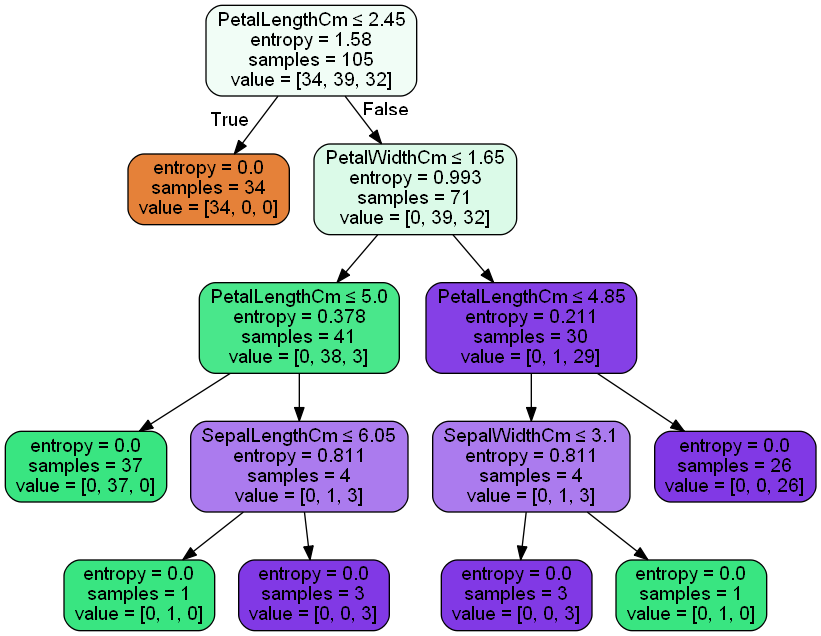

In [12]:
# Visualize the graph for Decision Tree
dot_data = StringIO()
export_graphviz(DecisionTree_entropy, out_file=dot_data,
                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Visualize the Graph for Decision Tree with Entropy**

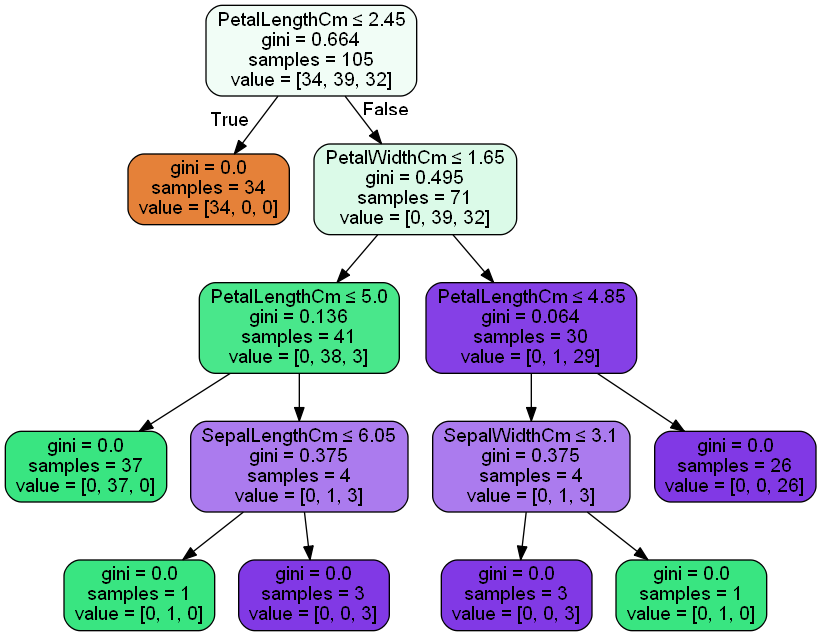

In [13]:
# Visualize the graph for Decision Tree
dot_data = StringIO()
export_graphviz(DecisionTree_giniIndex, out_file=dot_data,
                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())